In [209]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import numpy as np

In [210]:
'''URL to scrape'''
url = "https://coinmarketcap.com/defi/"
soup = BeautifulSoup(requests.get(url).content, "html.parser")

'''Find the rows we need to loop through in the table'''
list_coins = soup.select(".cmc-table-row")

'''COINS_DB will be where we store our results for later'''
coins_db = []

'''Process each row of the table and append the data objects to our COINS_DB list'''
for row in list_coins:
    rank = len(coins_db)+1
    name = row.select(".cmc-table__cell--sort-by__name")[0].find("a").string
    ticker =  row.select(".cmc-table__cell--sort-by__circulating-supply")[0].find("div").string.split(" ")[1]
    market_cap = row.select(".cmc-table__cell--sort-by__market-cap")[0].find("p").string
    price = row.select(".cmc-table__cell--sort-by__price")[0].find("a").string
    vol_24h = row.select(".cmc-table__cell--sort-by__volume-24-h")[0].find("a").string
    circ_supply = row.select(".cmc-table__cell--sort-by__circulating-supply")[0].find("div").string
    change_24h = row.select(".cmc-table__cell--sort-by__percent-change-24-h")[0].find("div").string
    coin_obj = {'rank':rank,'name': name,'ticker':ticker, 'market_cap': market_cap, 'price': price, '24h_vol': vol_24h,
                'circ_supply': circ_supply, '24h_change': change_24h}
    coins_db.append(coin_obj)
    
'''Create dataframe with our object, format the % change column, return top 50, and sort the remaining rows by the % change'''
df = pd.DataFrame(coins_db)
df['24h_change'] = df['24h_change'].apply(lambda s: float(s[:len(s)-1]))
df = df.head(50)
df.sort_values(by=['24h_change'], ascending=False, inplace=True)


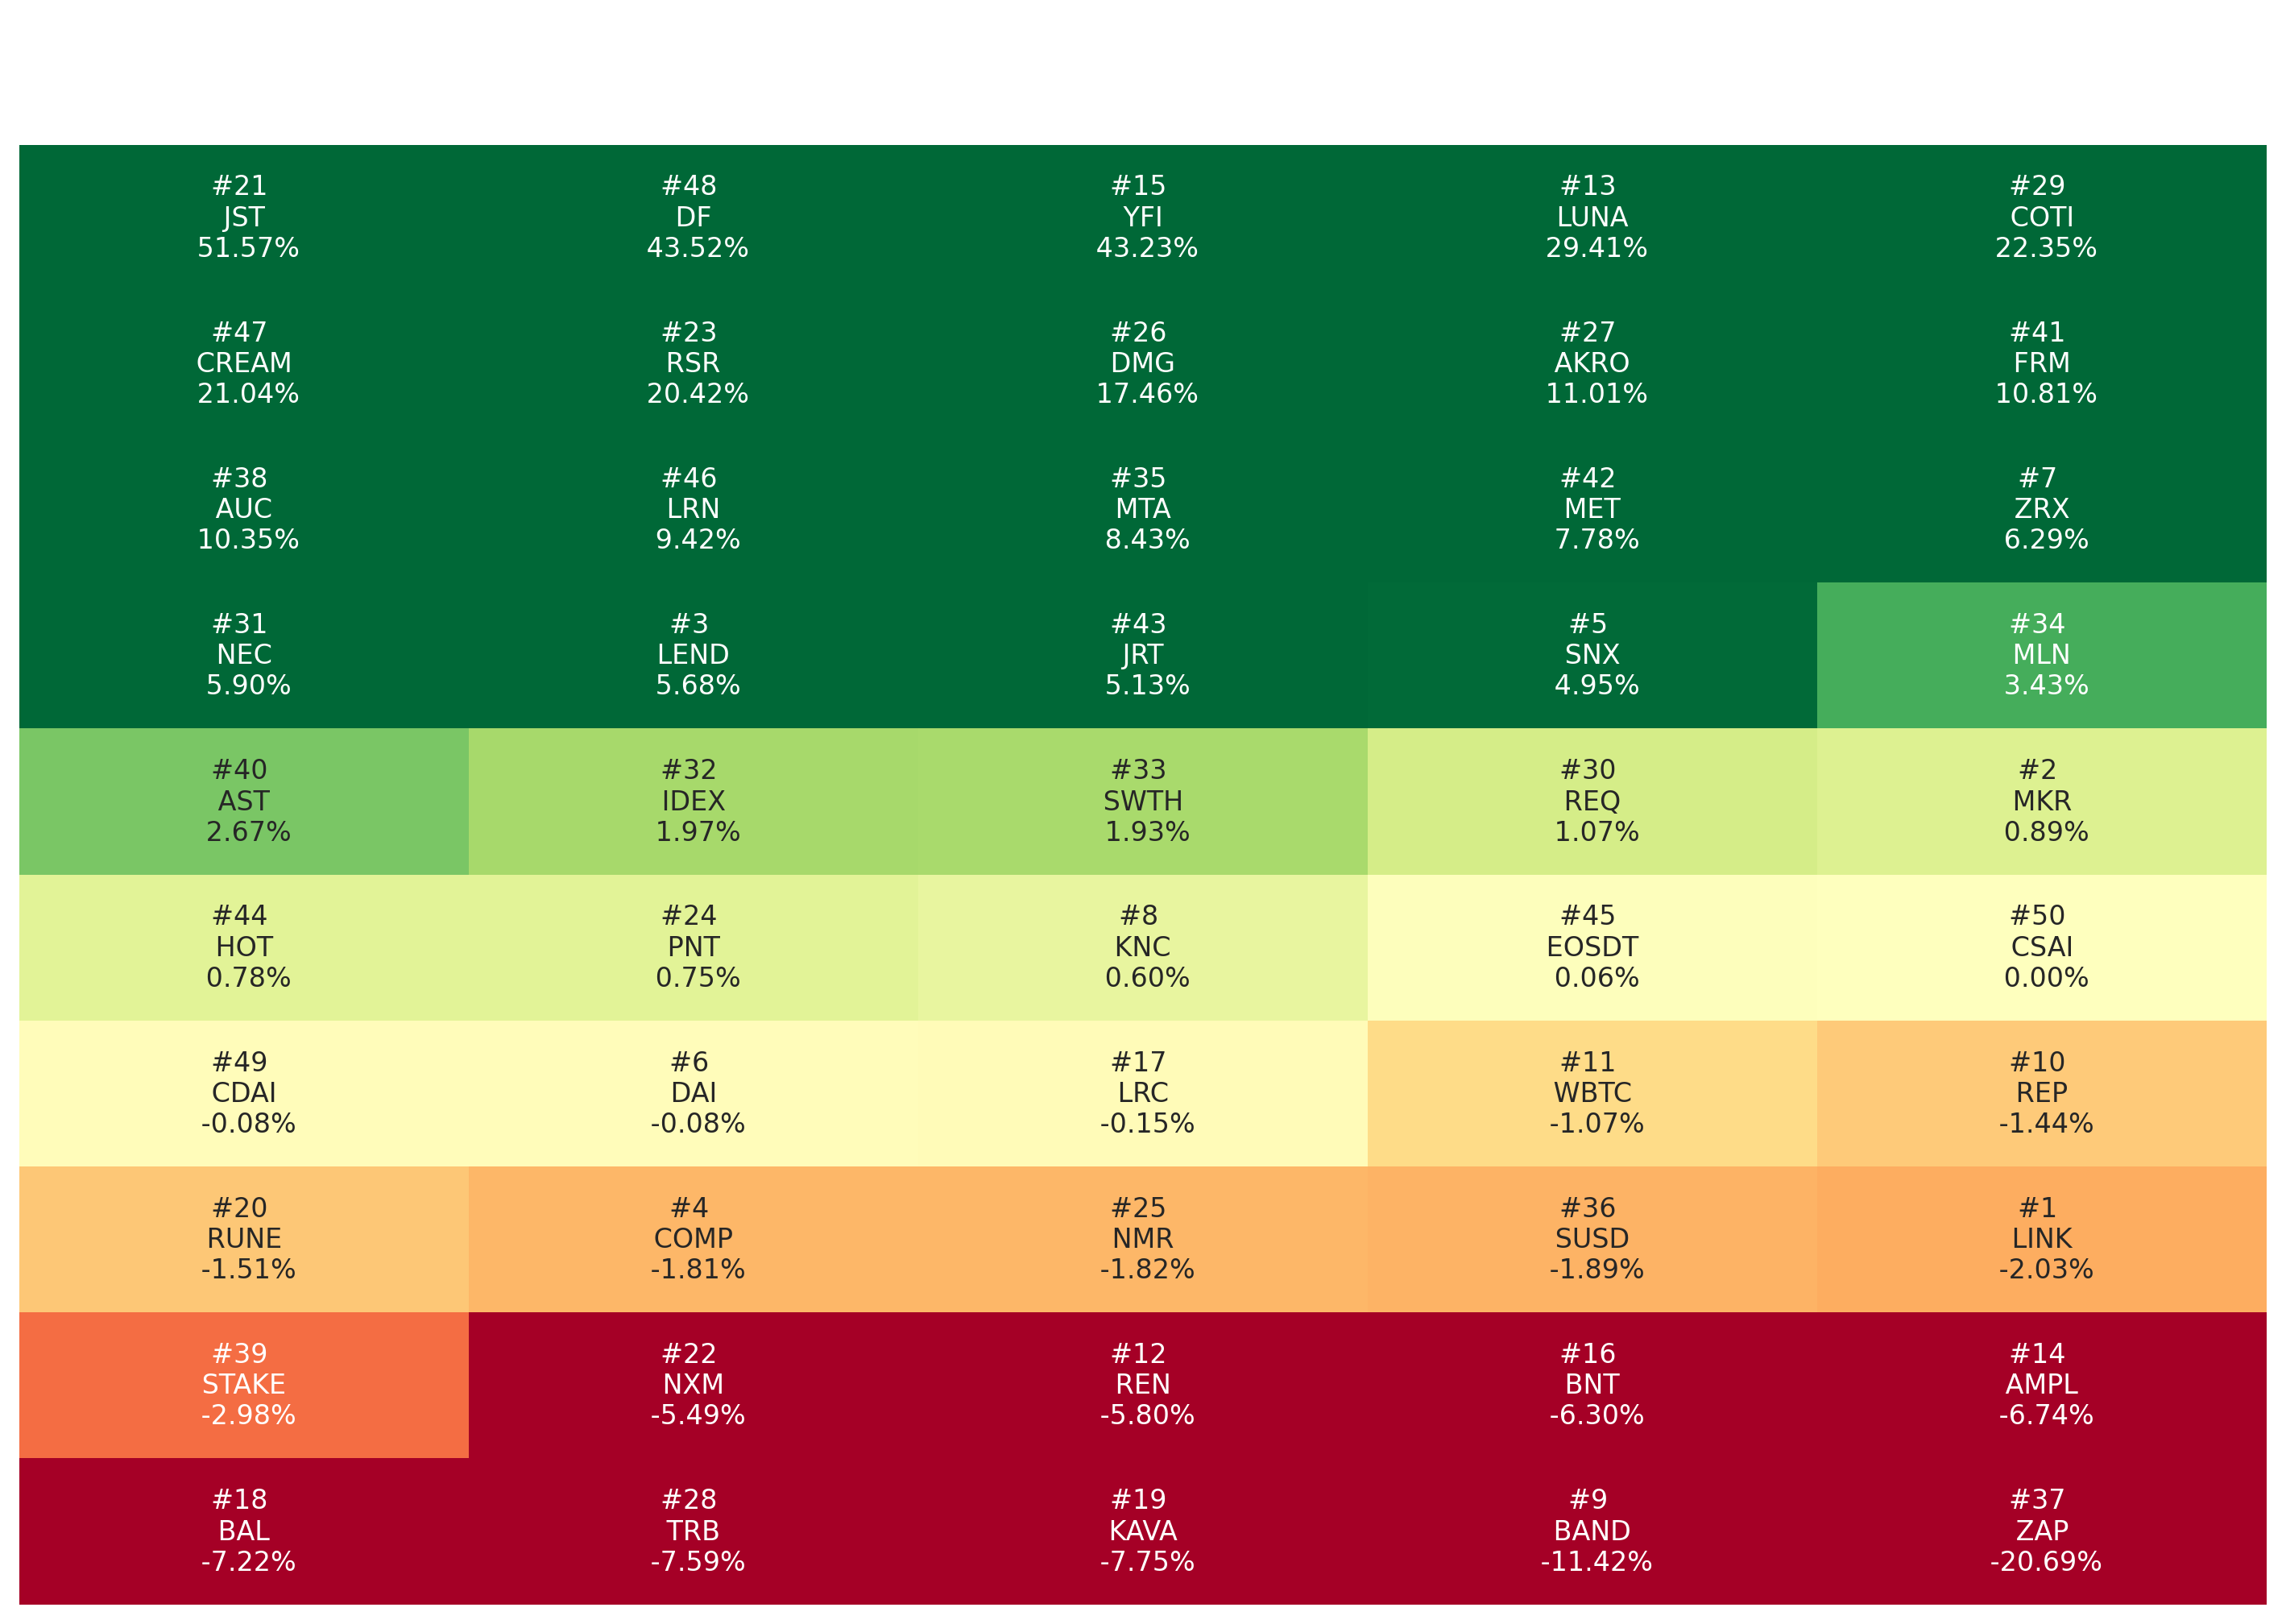

In [211]:

'''Row/Col are the dimensions of our heatmap, source is a copy of our dataframe'''
row = 10
col = 5
source = df

'''Create reshaped array of rank, ticker symbols, and percentage change that matches the desired shape of the heatmap'''
rank  = ((np.asarray(source['rank']))).reshape(row,col)
symbol = ((np.asarray(source['ticker']))).reshape(row,col)
per_change = ((np.asarray(source['24h_change']))).reshape(row,col)

'''Create reshaped array of labels using the above numpy arrays'''
labels = (np.asarray(["#{0} \n {1} \n {2:.2f}%".format(r,sym, pchg)
                      for r, sym, pchg in zip(rank.flatten(),symbol.flatten(),
                                               per_change.flatten())])).reshape(row,col)
'''Configure plot'''
plt.rcParams['figure.dpi'] = 240
fig, ax = plt.subplots(figsize=(15,10))
plt.title('Defi Top %s' %source.shape[0],fontsize=18,color="#ffffff")
plt.axis('off')
ax.title.set_position([0.5,1.05])

'''Create heatmap'''
sns.heatmap(per_change, annot=labels, fmt="", cmap='RdYlGn', vmin=-5, vmax=5, ax = ax,cbar=False)
plt.show()